# Pandas

## Series

import pandas as pd
import numpy as np
import string
t = pd.Series(np.arange(10), index=list(string.ascii_uppercase[:10]))
print(t,type(t))
print(t.index,"\n", t.values)

## read_csv

## 狗名字统计排序

In [33]:
import pandas as pd
dog_file = pd.read_csv("./dogNames2.csv")
dog_file = dog_file.sort_values(by = "Count_AnimalName", ascending=False)
print(dog_file.head(5), type(dog_file))
print("使用bool索引取出800<Count_AnimalName<1000的行")
print(dog_file[(800<dog_file["Count_AnimalName"])&(dog_file["Count_AnimalName"]<1000)])
print("使用bool索引取出Row_Labels.str.len()>4&Count_AnimalName>700")
print(dog_file[(dog_file["Row_Labels"].str.len()>4)&(dog_file["Count_AnimalName"]>700)])

      Row_Labels  Count_AnimalName
1156       BELLA              1195
9140         MAX              1153
2660     CHARLIE               856
3251        COCO               852
12368      ROCKY               823 <class 'pandas.core.frame.DataFrame'>
使用bool索引取出800<Count_AnimalName<1000的行
      Row_Labels  Count_AnimalName
2660     CHARLIE               856
3251        COCO               852
12368      ROCKY               823
使用bool索引取出Row_Labels.str.len()>4&Count_AnimalName>700
      Row_Labels  Count_AnimalName
1156       BELLA              1195
2660     CHARLIE               856
12368      ROCKY               823
8552       LUCKY               723


## DataFrame

In [3]:
import pandas as pd
import numpy as np
pd.DataFrame(np.arange(12).reshape(3,4))

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


## 结合Mongodb对DataFrame进行操作

In [37]:
from pymongo import MongoClient
import pandas as pd
#
client = MongoClient()
collection = client["douban2"]["tv1"]
data = list(collection.find())
data_list = []
for i in data:
    temp = {}
    temp["info"] = i["info"]
    temp["rating_count"] = i["rating"]["count"]
    temp["rating_value"] = i["rating"]["value"]
    temp["title"] = i["title"]
    temp["country"] = i["tv_category"]
    temp["directors"] = i["directors"]
    temp["actors"] = i["actors"]
    data_list.append(temp)
df = pd.DataFrame(data_list)
print(df.head(2)) # 取出头两行
print("df.info() = , df.describe() = ")
print(df.info(), df.describe()) # 打印概要信息
print(df["info"].str.split("/").tolist())

           actors  country directors                                     info  \
0  [潘粤明, 王泷正, 梁缘]  chinese      [王伟]  王伟/潘粤明/王泷正/梁缘/剧情/犯罪/悬疑/2017-08-30(中国大陆)   
1   [孙俪, 陈晓, 何润东]  chinese      [丁黑]      丁黑/孙俪/陈晓/何润东/剧情/古装/2017-08-30(中国大陆)   

   rating_count  rating_value    title  
0         23043           9.0     白夜追凶  
1         20867           8.5  那年花开月正圆  
df.info() = , df.describe() = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 7 columns):
actors          2379 non-null object
country         2379 non-null object
directors       2379 non-null object
info            2379 non-null object
rating_count    2379 non-null int64
rating_value    2379 non-null float64
title           2379 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 130.2+ KB
None         rating_count  rating_value
count    2379.000000   2379.000000
mean     9079.419084      7.722783
std     16613.297194      1.068567
min       211.000000      2.

## 电影数直方图

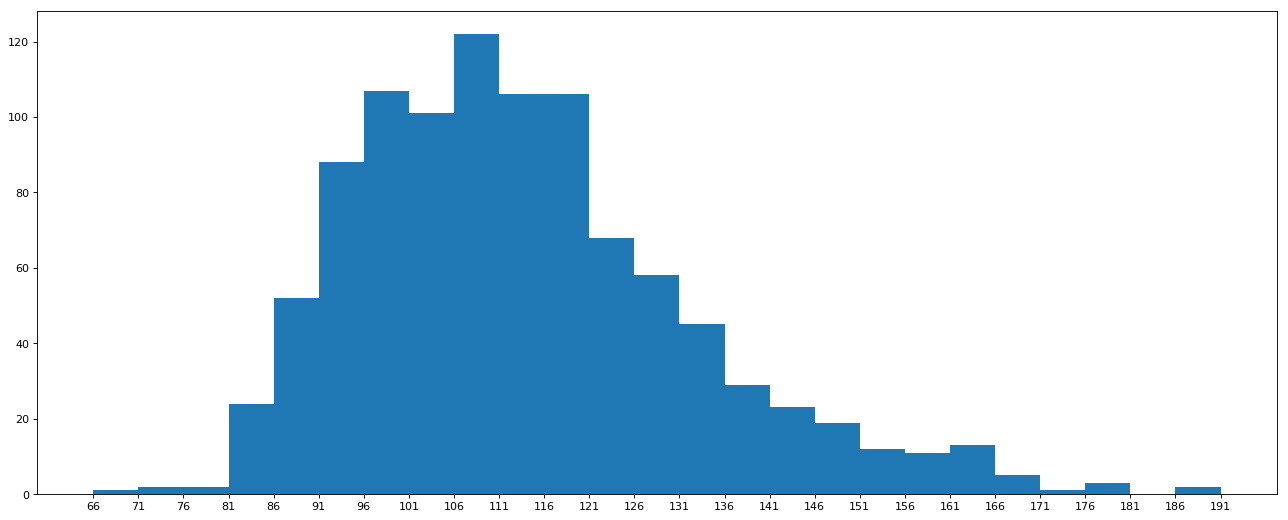

In [15]:
# 描述runtime分布情况
import pandas as pd
from matplotlib import pyplot as plt
file_path = "./IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# 数据概要
#print(df.head(1), df.info())
# 准备数据
runtime_data = df["Runtime (Minutes)"].values
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
# 计算组数
num_bin = (max_runtime - min_runtime)//5
# set figure size
plt.figure(figsize = (20,8), dpi=80)
plt.hist(runtime_data, num_bin)
# set x ticks
_x = list(range(min_runtime, max_runtime+5, 5))
plt.xticks(_x)
# display figure
plt.show()

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
file_path = "./IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# 数据概要
print(df.head(1), df.info())
# 准备数据
rating_data = df["Rating"].values
directors_data = df["Director"].values
actors_data = df["Actors"].str.split(",").tolist()
actors_list = [i for j in actors_data for i in j] #双循环遍历list in list
print(rating_data.mean()) #  rating mean
print(len(df["Director"].unique())) # numbers of directors
print(len(set(actors_list))) #numbers of actors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                                         Description    Director  \
0  A group of intergalactic criminals are forced ...  James Gunn   

                                              Actors  Year